<a href="https://colab.research.google.com/github/leminhquoc248/AI_code/blob/main/fruit_iden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/fruit_iden/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 251 images belonging to 10 classes.


In [4]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/fruit_iden/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 49 images belonging to 10 classes.


In [5]:
training_set.class_indices

{'train_bưởi': 0,
 'train_cam': 1,
 'train_lê': 2,
 'train_mận': 3,
 'train_nhãn': 4,
 'train_nho': 5,
 'train_ớt': 6,
 'train_sầu': 7,
 'train_vải': 8,
 'train_đu_đủ': 9}

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [7]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(training_set,epochs=100,batch_size=10,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
8/8 [==============================] - 94s 10s/step - loss: 7.9486 - accuracy: 0.0797 - val_loss: 2.2934 - val_accuracy: 0.1020
Epoch 2/100
8/8 [==============================] - 2s 266ms/step - loss: 2.2956 - accuracy: 0.0956 - val_loss: 2.2633 - val_accuracy: 0.1020
Epoch 3/100
8/8 [==============================] - 2s 269ms/step - loss: 2.2210 - accuracy: 0.1474 - val_loss: 2.0576 - val_accuracy: 0.1633
Epoch 4/100
8/8 [==============================] - 2s 279ms/step - loss: 1.9968 - accuracy: 0.2829 - val_loss: 1.8799 - val_accuracy: 0.3673
Epoch 5/100
8/8 [==============================] - 2s 274ms/step - loss: 1.8616 - accuracy: 0.3068 - val_loss: 1.9540 - val_accuracy: 0.2449
Epoch 6/100
8/8 [==============================] - 2s 269ms/step - loss: 1.8852 - accuracy: 0.3028 - val_loss: 1.8543 - val_accuracy: 0.2857
Epoch 7/100
8/8 [==============================] - 2s 271ms/step - loss: 1.6191 - accuracy: 0.3944 - val_loss: 1.5699 - val_accuracy: 0.4286
Epoch 8/100
8/

In [10]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.028411326929926872
Train Accuracy 0.9880478382110596


<function matplotlib.pyplot.show>

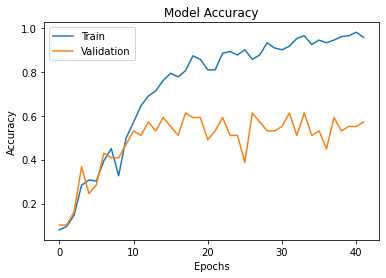

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [12]:
# Lưu lại
model.save("Final.h5")
model_CNN=load_model('Final.h5')

trai mận


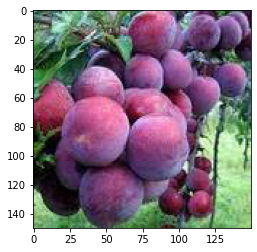

In [14]:
img=load_img('/content/drive/MyDrive/fruit_iden/test/test_mận/tải xuống (26).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='trai buoi'
elif round(result[0][1])==1:
  prediction='trai cam'
elif round(result[0][2])==1:
  prediction='trai le'
elif round(result[0][3])==1:
  prediction='trai mận'  
elif round(result[0][4])==1:
  prediction='trái nhãn'
elif round(result[0][5])==1:
  prediction='trái nho'
elif round(result[0][6])==1:
  prediction='trái ớt'
elif round(result[0][7])==1:
  prediction='sầu riêng'
elif round(result[0][8])==1:
  prediction='trái vải'
elif round(result[0][9])==1:
  prediction='đu đủ'  
print(prediction)

trai cam


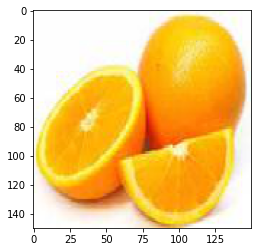

In [15]:
img=load_img('/content/drive/MyDrive/fruit_iden/test/test_cam/tải xuống (22).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='trai buoi'
elif round(result[0][1])==1:
  prediction='trai cam'
elif round(result[0][2])==1:
  prediction='trai le'
elif round(result[0][3])==1:
  prediction='trai mận'  
elif round(result[0][4])==1:
  prediction='trái nhãn'
elif round(result[0][5])==1:
  prediction='trái nho'
elif round(result[0][6])==1:
  prediction='trái ớt'
elif round(result[0][7])==1:
  prediction='sầu riêng'
elif round(result[0][8])==1:
  prediction='trái vải'
elif round(result[0][9])==1:
  prediction='đu đủ'  
print(prediction)